# Importation des librairies

In [192]:
#import os
#cwd = os.getcwd()
#cwd

In [193]:
#!pip install openpyxl

In [194]:
#!pip install geopandas

In [195]:
# Pandas est une bibliothèque logicielle écrite pour le langage de programmation Python pour la manipulation et l'analyse de données.
import pandas as pd
# NumPy est une bibliothèque pour le langage de programmation Python, ajoutant la prise en charge de grands tableaux et matrices multidimensionnels, ainsi qu'une large collection de fonctions mathématiques de haut niveau pour opérer sur ces tableaux.
import numpy as np
# Matplotlib est une bibliothèque de traçage pour Python et pyplot nous offre un cadre de traçage de type MatLab. Nous l'utiliserons dans notre fonction de traceur pour tracer des données.
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# Seaborn est une bibliothèque de visualisation de données Python basée sur matplotlib. Il fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs
import seaborn as sns

# Importation des librairies pour la représentation cartographique
import geopandas as gpd
import folium
from folium.plugins import TimeSliderChoropleth
import shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from folium.plugins import MarkerCluster

# Importation de la table et analyse exploratoire

In [196]:
data_hydo = pd.read_excel('consommation-historique-region-administrative-11mars2024.xlsx')
df0 = pd.DataFrame(data_hydo)
df_conso = df0.copy()
df_conso['ANNEE_MOIS'] = pd.to_datetime(df_conso['ANNEE_MOIS'])
df_conso['ANNEE'], df_conso['MOIS'] = df_conso['ANNEE_MOIS'].dt.year, df_conso['ANNEE_MOIS'].dt.month
df_conso['ANNEE_MOIS'] = df_conso['ANNEE_MOIS'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
df_conso.head()

,REGION_ADM_QC_TXT,ANNEE_MOIS,SECTEUR,Total (kWh),ANNEE,MOIS
0,Abitibi-Témiscamingue,2016-01,AGRICOLE,3.704146e+06,2016,1
1,Abitibi-Témiscamingue,2016-01,COMMERCIAL,5.455593e+07,2016,1
2,Abitibi-Témiscamingue,2016-01,INDUSTRIEL,3.153137e+08,2016,1
3,Abitibi-Témiscamingue,2016-01,INSTITUTIONNEL,3.128970e+07,2016,1
4,Abitibi-Témiscamingue,2016-01,RÉSIDENTIEL,1.756439e+08,2016,1


# Analyse Descriptive

### A- Secteurs VS Consommation

#### Diagramme Circulaire

In [205]:
df_secteur= df_conso.groupby(['SECTEUR'])['Total (kWh)'].sum().reset_index().set_index('SECTEUR')
df_secteur.head()

,Total (kWh)
SECTEUR,
AGRICOLE,14079528140
COMMERCIAL,217960735425
INDUSTRIEL,432982965800
INSTITUTIONNEL,73716058162
RÉSIDENTIEL,459574931636


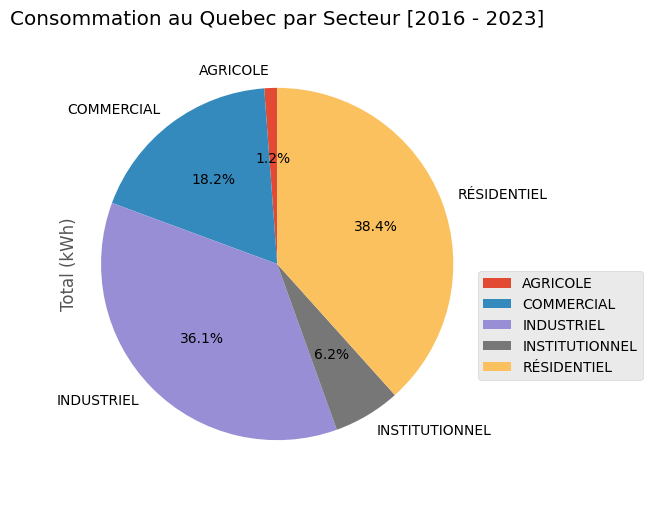

In [206]:
# Diagramme circulaire
df_secteur['Total (kWh)'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # ajouter des pourcentages
                            startangle=90,     # angle de départ 90°
                            )

plt.title('Consommation au Quebec par Secteur [2016 - 2023]')
plt.axis('equal') # Définit le diagramme circulaire pour qu'il ressemble à un cercle.
plt.legend(labels=df_secteur.index,loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

__INTERPRETATION__ : Le secteur ayant la plus forte consommation est le secteur Résidentiel, suivi du secteur Industriel, Commercial, Institutionnel et enfin agricole.

#### Boites à moustache

In [207]:
df_secteur2_0 = df_conso.groupby(['SECTEUR', 'ANNEE'])['Total (kWh)'].sum().reset_index()
df_secteur2_1 = pd.crosstab(df_secteur2_0['ANNEE'], df_secteur2_0['SECTEUR'],values=df_secteur2_0['Total (kWh)'], aggfunc='sum')

In [208]:
df_secteur2_1.describe()

SECTEUR,AGRICOLE,COMMERCIAL,INDUSTRIEL,INSTITUTIONNEL,RÉSIDENTIEL
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,1.759941e+09,2.724509e+10,5.412287e+10,9.214507e+09,5.744687e+10
std,1.211716e+08,8.986697e+08,2.350727e+09,1.674841e+08,1.383633e+09
min,1.520304e+09,2.604075e+10,5.042930e+10,8.943404e+09,5.563772e+10
25%,1.719130e+09,2.650335e+10,5.287518e+10,9.138605e+09,5.639202e+10
50%,1.776117e+09,2.737310e+10,5.441055e+10,9.197065e+09,5.729990e+10
75%,1.827564e+09,2.808370e+10,5.580876e+10,9.297625e+09,5.867232e+10
max,1.903447e+09,2.817810e+10,5.731319e+10,9.493653e+09,5.923686e+10


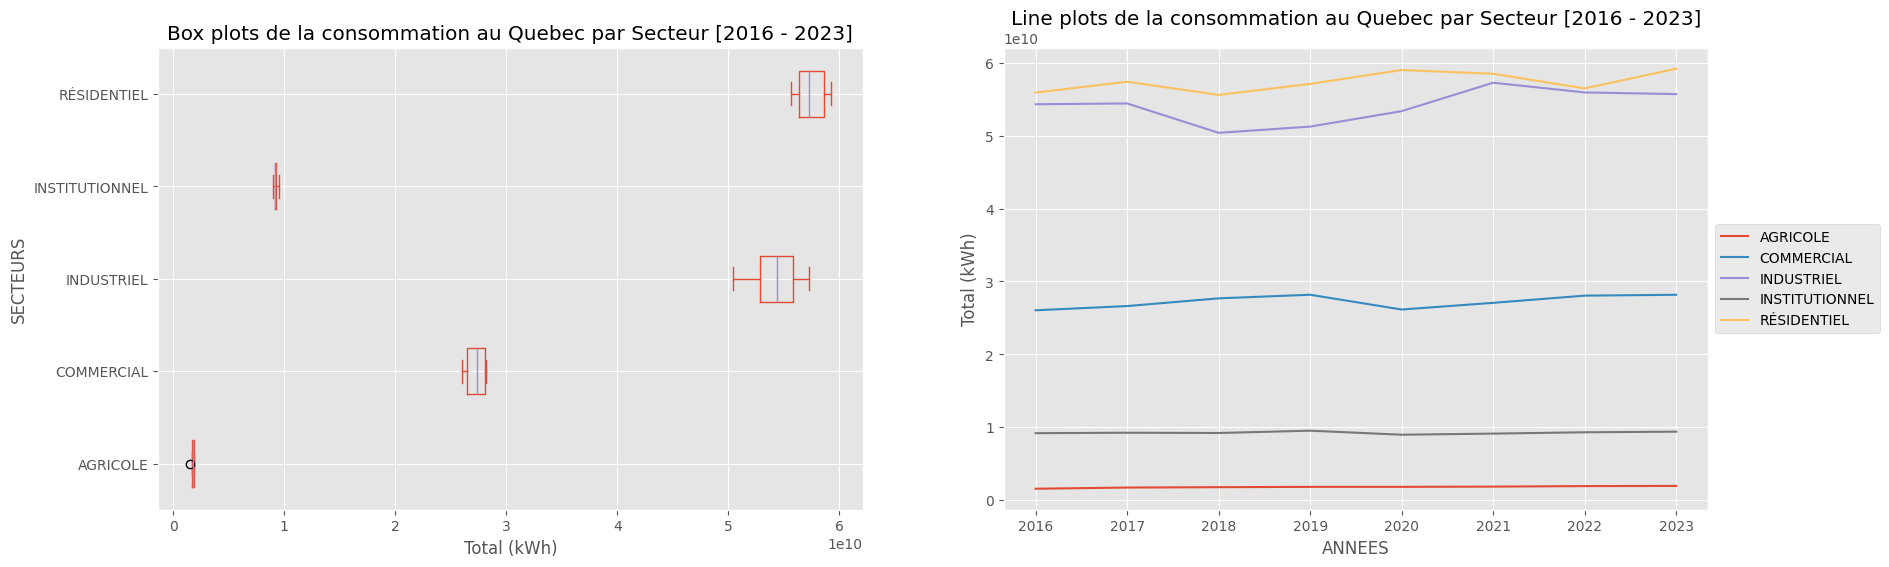

In [209]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_secteur2_1.plot(kind='box', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box plots de la consommation au Quebec par Secteur [2016 - 2023]')
ax0.set_xlabel('Total (kWh)')
ax0.set_ylabel('SECTEURS')

# Subplot 2: Line plot
df_secteur2_1.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line plots de la consommation au Quebec par Secteur [2016 - 2023]')
ax1.set_ylabel('Total (kWh)')
ax1.set_xlabel('ANNEES')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

__INTERPRETATION__ : 
> 1- Le secteur ayant la plus forte consommation est le secteur Résidentiel, suivi du secteur Industriel, Commercial, Institutionnel et enfin agricole.   
> 2- La consommation induite par le secteur résidentiel est telle que, de janvier 2016 à décembre 2023, la consommation moyenne de ce secteur (soit 5.910387e+10 kWh) a été supérieure au maximum de ce que le secteur industriel a consommé (soit 5.731319e+10 kWh).



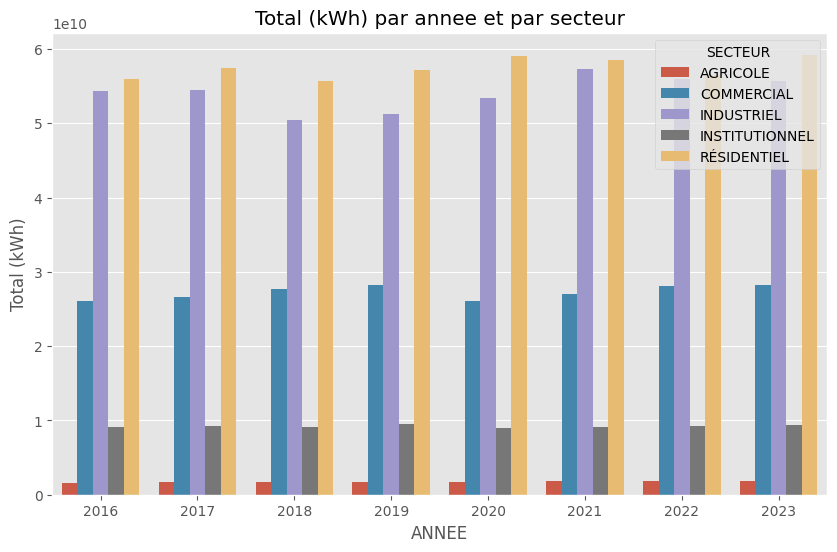

In [210]:
# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='ANNEE', y='Total (kWh)', hue='SECTEUR', data=df_secteur2_0)
#plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('ANNEE')
plt.ylabel('Total (kWh)')
plt.title('Total (kWh) par annee et par secteur')

plt.show()

> Natacha Sessou  
> https://www.linkedin.com/in/sara-jelonek-578150162/

## Change Log

|Date (YYYY-MM-DD)|VersionChange| Description|
|-|-|-|
2024-04-29|0.1|Création du notebook|
